## 1.Import the necessary libraries

In [512]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import ttest_ind
from scipy import stats
from sklearn.preprocessing import LabelEncoder

## 2.Read the data as a data frame

In [513]:
medcost = pd.read_csv('insurance.csv')

## 3.Perform basic EDA which should include the following and print out your insights at every step.

### a.Shape of the data

In [514]:
medcost.shape

(1338, 7)

Data contains medical cost of 1338 people characterized by 7 attributes

### b.Data type of each attribute

In [515]:
medcost.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

four attributes are numerical and three attributes are categorical

### c.Checking the presence of missing values

In [516]:
medcost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [517]:
medcost.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no missing values

### d.5 point summary of numerical attributes

In [518]:
medcost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


For age: person with max age and min age are well within the upper limit and lower limit indicating there are no outliers

For bmi values: max value lies beyond upper limit indicating max value is an outlier

For charges: max value lies clearly beyond the upper limit indicating that max charges value is an outlier.

where as,

upper limit = Q3 + 1.5*IQR

lower limit = Q1 - 1.5*IQR

### e.Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

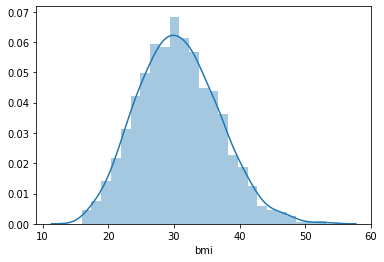

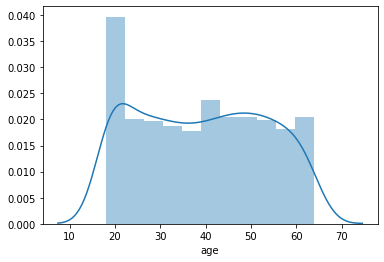

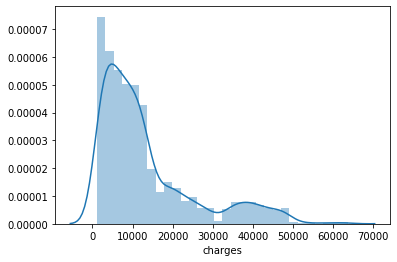

In [519]:
sns.distplot(medcost['bmi'])
plt.show()
sns.distplot(medcost['age'])
plt.show()
sns.distplot(medcost['charges'])
plt.show()

distribution of bmi and age is almost symmetrical with bmi is close to normal distribution.Age distribution seems to be flat.
Distribution of charges reflects positively skewed behavior.

### f.Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [520]:
print('Skewness for bmi = ',skew(medcost['bmi']))
print('Skewness for age = ',skew(medcost['age']))
print('Skewness for charges = ',skew(medcost['charges']))

Skewness for bmi =  0.28372857291709386
Skewness for age =  0.055610083072599126
Skewness for charges =  1.5141797118745743


Interpretation:

Skewness value of positive implies distribution is positively skewed i.e right tail is longer.

Skewness value of negative implies that distribution is negatively skewed i.e left tail is longer.

Skewness of zero implies that distribution is symmetrical

From the obtained values, bmi and age reflects close to symmetry.
Value of skewness for charges reflect positive skewness (with longer right tail).

### g.Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

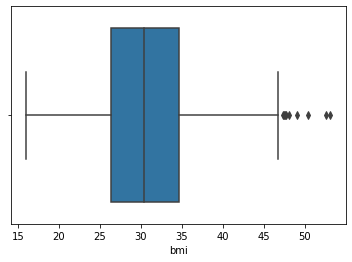

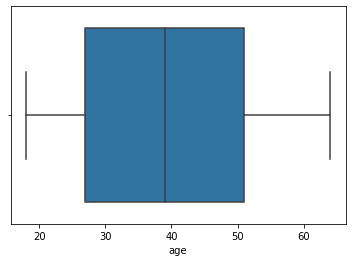

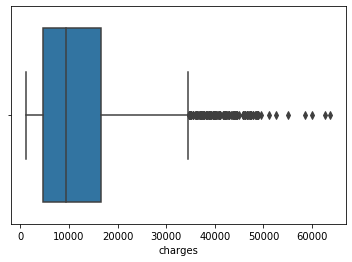

In [521]:
sns.boxplot(medcost['bmi'],orient = 'h')
plt.show()
sns.boxplot(medcost['age'],orient = 'h')
plt.show()
sns.boxplot(medcost['charges'],orient = 'h')
plt.show()

There are significant number of outliers for charges and bmi attributes.Age column doesnot have outliers.

### h.Distribution of categorical columns (include children)

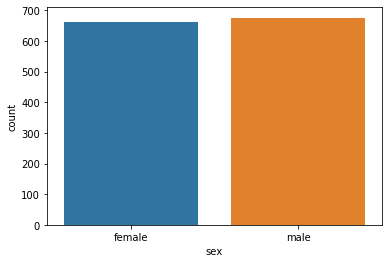

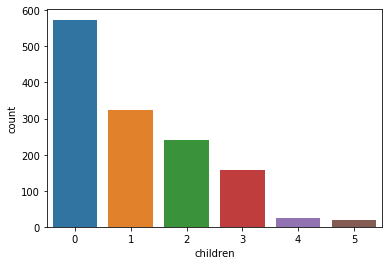

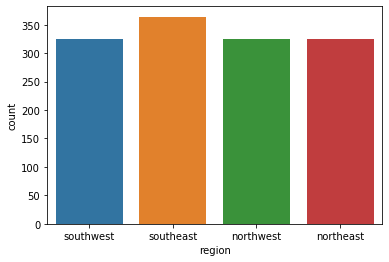

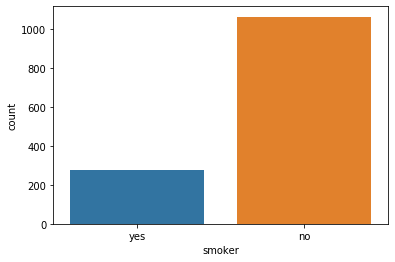

In [522]:
sns.countplot(medcost['sex'])
plt.show()
sns.countplot(medcost['children'])
plt.show()
sns.countplot(medcost['region'])
plt.show()
sns.countplot(medcost['smoker'])
plt.show()

Data contains no significant difference between number of male and female entries.

People with no children are highest in the given data in between 550 to 600.Then people with one children, two, three , four and five in the order from higher to lower.People with four and five children are each less than 50

It has almost equal number of beneficiaries across regions.Slightly higher number of beneficiaries of Southeast region  than other three regions (Northeast, Northwest and Southwest).

Number of smokers are significantly less than non smokers.

### i.Pair plot that includes all the columns of the data frame

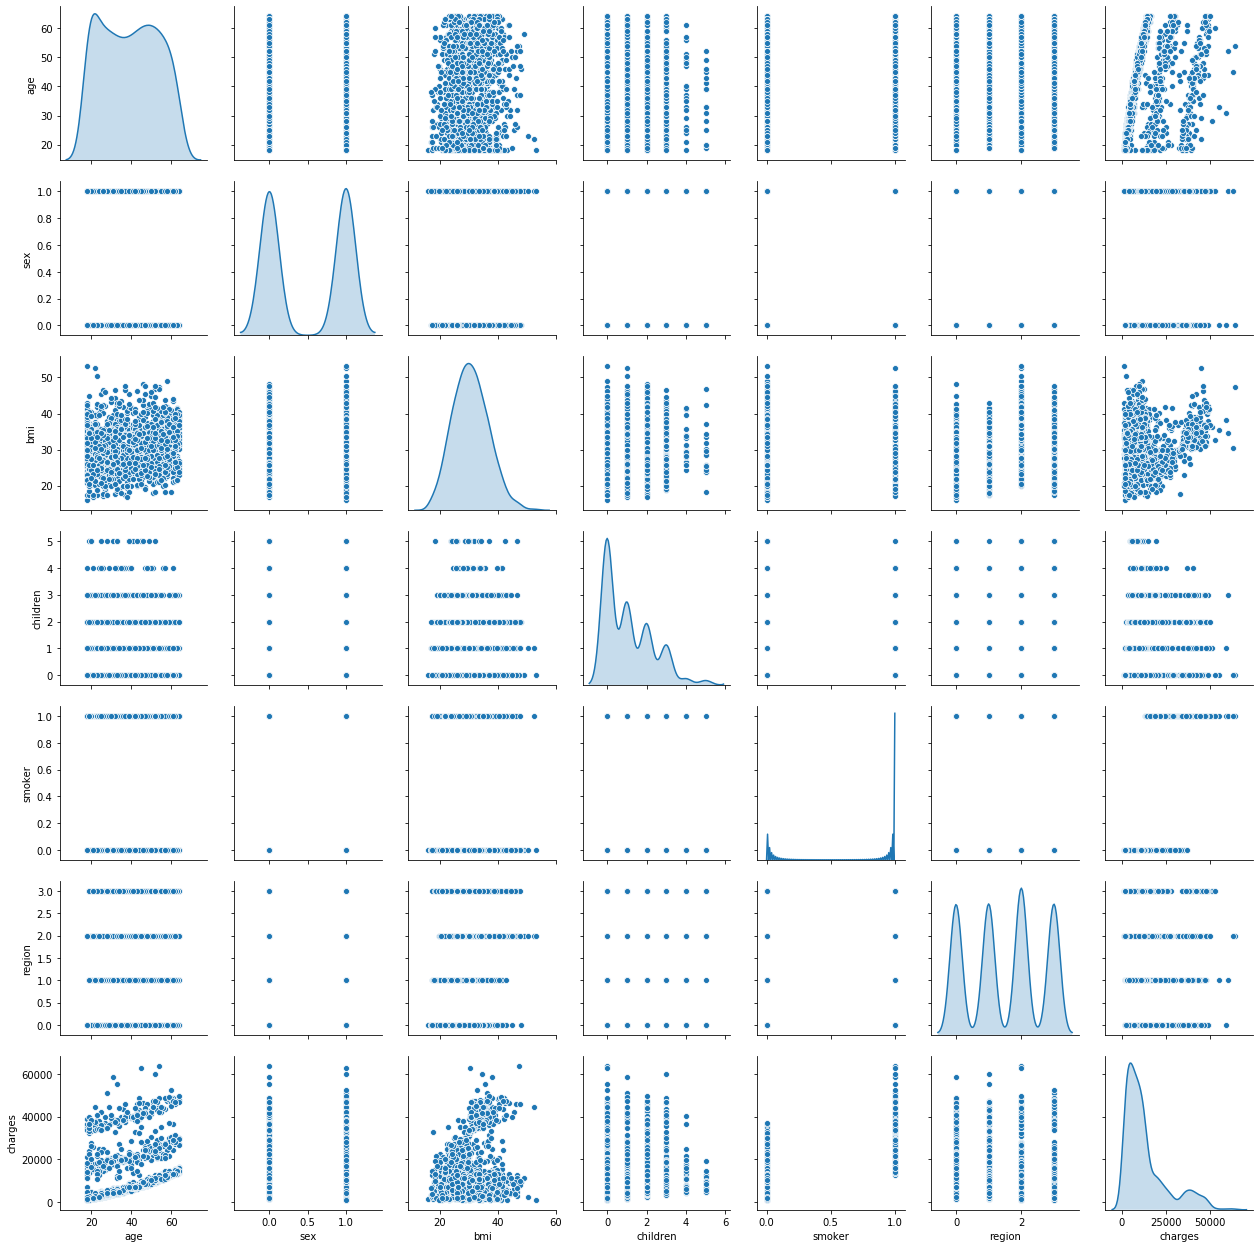

In [528]:
le_region = LabelEncoder()
le_sex = LabelEncoder()
le_smoker = LabelEncoder()
medcost['region']=le_region.fit_transform((medcost['region']))
medcost['sex']=le_sex.fit_transform((medcost['sex']))
medcost['smoker']=le_smoker.fit_transform((medcost['smoker']))
sns.pairplot(medcost, diag_kind='kde')

Distribution of children shows six modes, out of which four modes are prominent at values 0,1,2,3

Distribution of charges show positive skew.

Distribution of bmi is very close to normal.

In [529]:
medcost['region']=le_region.inverse_transform((medcost['region']))
medcost['sex']=le_sex.inverse_transform((medcost['sex']))
medcost['smoker']=le_smoker.inverse_transform((medcost['smoker']))

## 4.Answer the following questions with statistical evidence

### a.Do charges of people who smoke differ significantly from the people who don't?

In [531]:
medcost_smokers = medcost[medcost['smoker'] == 'yes']
medcost_nonsmokers = medcost[medcost['smoker'] == 'no']
ttest_ind(medcost_smokers['charges'],medcost_nonsmokers['charges'])

Ttest_indResult(statistic=46.664921172723716, pvalue=8.271435842177219e-283)

p value < 0.05, so we reject null hypothesis and can infer that charges of people who smoke differ significantly from people who don't smoke.

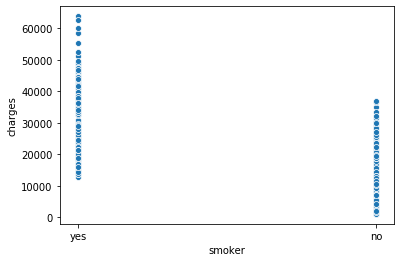

In [532]:
sns.scatterplot(medcost['smoker'],medcost['charges'])

Visual Interpretation:

Scatter plot also reflects that charges corresponding to smokers have significant difference from those who donot smoke.

### b.Does bmi of males differ significantly from that of females?

In [533]:
medcost_malebmi = medcost[medcost['sex'] == 'male']
medcost_femalebmi = medcost[medcost['sex'] == 'female']
stats.levene(medcost_malebmi['bmi'],medcost_femalebmi['bmi'])

LeveneResult(statistic=0.0039394029791134, pvalue=0.949963293424026)

As p value > 0.05, we fail to reject the null hypothesis i.e. data under consideration satisfy Levene's criteria for equality of vairance which implies ANOVA test can be performed on this data set for comparison.

In [534]:
stats.f_oneway(medcost_malebmi['bmi'],medcost_femalebmi['bmi'])

F_onewayResult(statistic=2.878969506932102, pvalue=0.08997637178992055)

p value > 0.05, so we fail to reject the null hypothesis and can conclude that bmi of male do not differ significantly from that of females

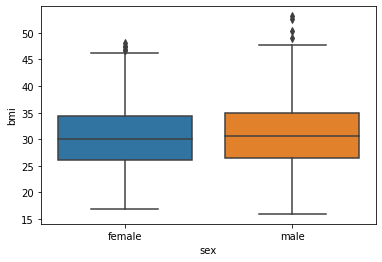

In [535]:
sns.boxplot(medcost['sex'],medcost['bmi'])

Visual Interpretation:

Box plot also shows that there is no significant difference in bmi between males and females.

### c.Is the proportion of smokers significantly different in different genders?

In [536]:
from scipy.stats import chisquare,chi2_contingency
f_obs = pd.crosstab(medcost['smoker'],medcost['sex'])
print(f_obs)
chisquare([115,159])

sex     female  male
smoker              
no         547   517
yes        115   159


Power_divergenceResult(statistic=7.065693430656935, pvalue=0.007857389588994759)

As p-value < 0.05, we reject the null hypothesis i.e. there is significant difference in proportions of smokers in different genders.

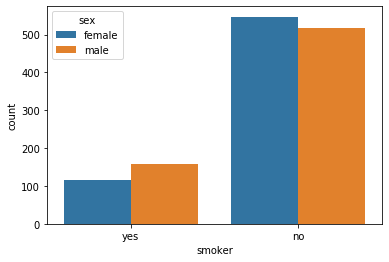

In [537]:
sns.countplot(medcost['smoker'],hue = medcost['sex'])

Visual Interpretation:

Count plot also shows that proportion of smokers are significantly different in different genders.

### d.Is the distribution of bmi across women with no children, one child and two children, the same ?

In [538]:
medcost_women0child = medcost[(medcost['sex']=='female') & (medcost['children'] == 0)]
medcost_women1child = medcost[(medcost['sex']=='female') & (medcost['children'] == 1)]
medcost_women2child = medcost[(medcost['sex']=='female') & (medcost['children'] == 2)]
stats.levene(medcost_women0child['bmi'],medcost_women1child['bmi'],medcost_women2child['bmi'])

LeveneResult(statistic=0.9433311607108589, pvalue=0.3899432394522804)

As p value > 0.05, we fail to reject the null hypothesis i.e. data under consideration satisfy Levene's criteria for equality of vairance which implies ANOVA test can be performed on this data set for comparison.

In [539]:
stats.f_oneway(medcost_women0child['bmi'],medcost_women1child['bmi'],medcost_women2child['bmi'])

F_onewayResult(statistic=0.3344720147757968, pvalue=0.7158579926754841)

As p value > 0.05, we fail to reject the null hypothesis and can conclude that distribution of bmi across women with no children, one child and two children are not significantly different.

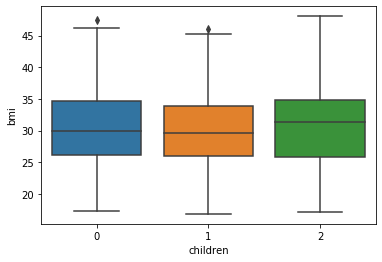

In [540]:
medcost_women = medcost[(medcost['sex']=='female') & (medcost['children'] <=2)]
sns.boxplot(medcost_women['children'],medcost_women['bmi'],orient='v')

Visual Interpretation:

Box plot also shows that distribution of bmi across women with no children, one child and two children are not significantly different.